In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Load the dataset
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean data by removing the top and bottom 2.5% of page views
low = df['value'].quantile(0.025)
high = df['value'].quantile(0.975)
df_clean = df[(df['value'] >= low) & (df['value'] <= high)]

# Preview the cleaned dataset
df_clean.head()


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


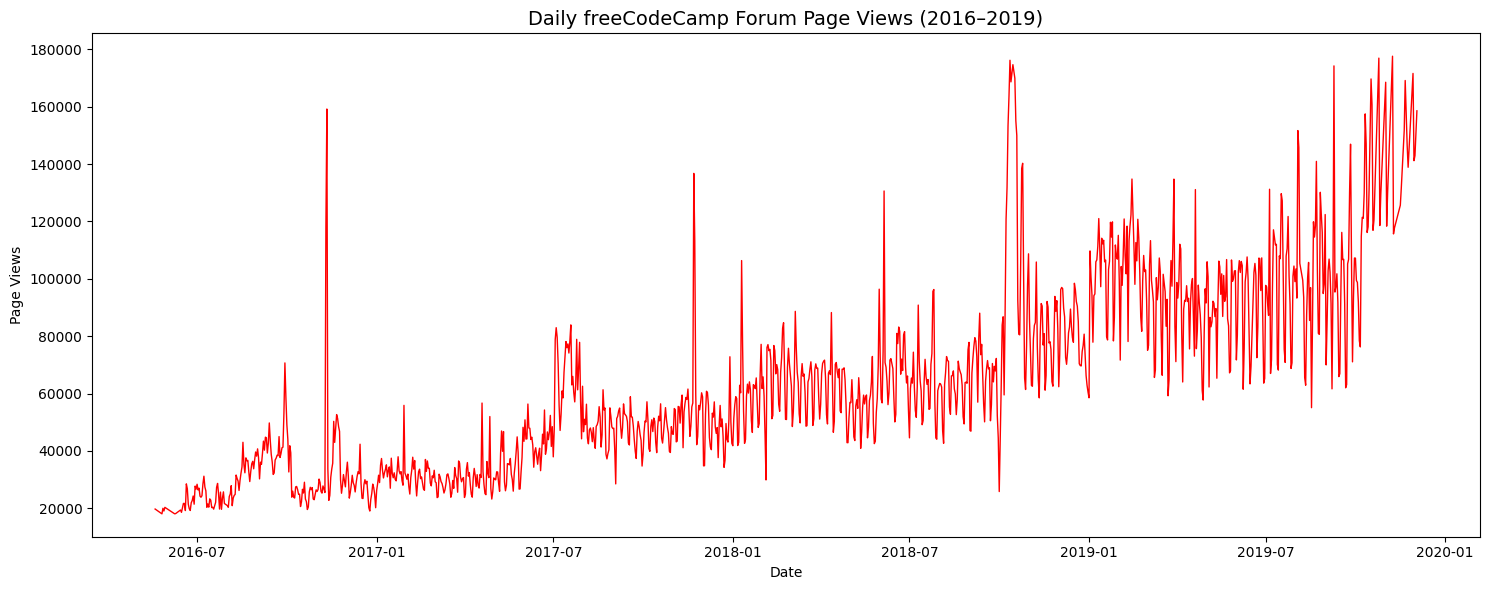

In [3]:
# Step 3: Line Plot - Daily page views 2016 to 2019

# Set figure size
plt.figure(figsize=(15, 6))

# Plot the line
plt.plot(df_clean.index, df_clean['value'], color='red', linewidth=1)

# Set title and labels
plt.title('Daily freeCodeCamp Forum Page Views (2016–2019)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Page Views')

# Save the plot
plt.tight_layout()
plt.savefig('line_plot.png')

# Show the plot
plt.show()


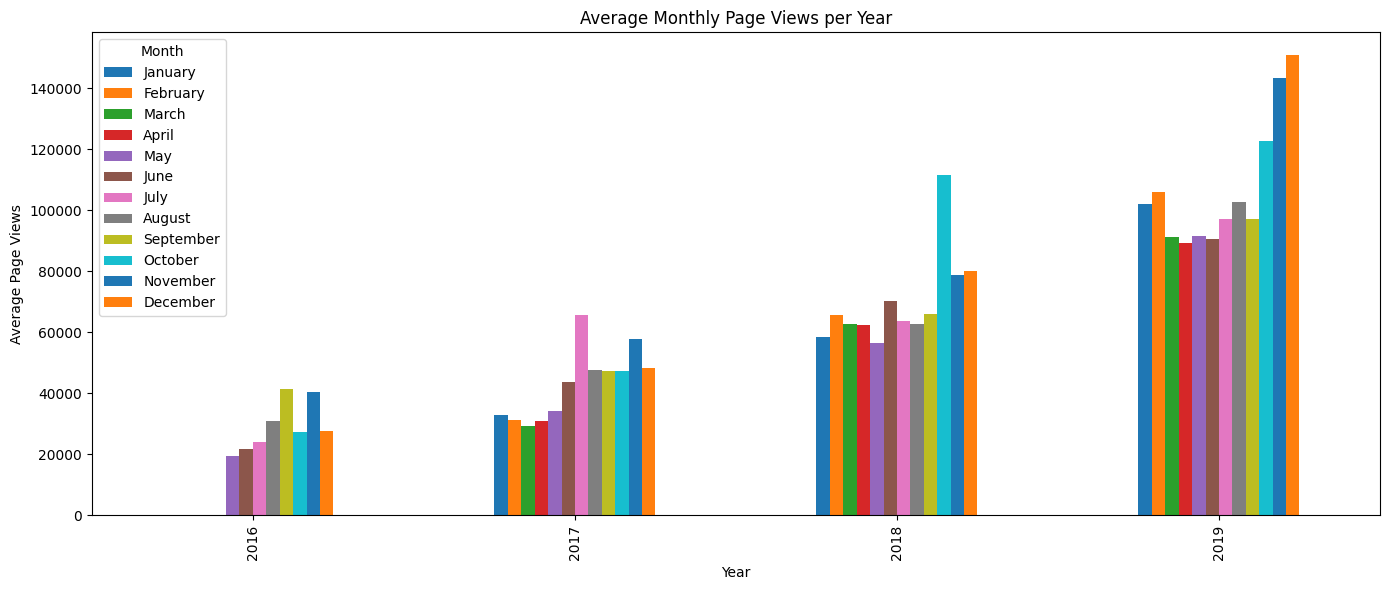

In [4]:
# Step 4: Prepare data for bar plot

# Reset index to access 'date' as a column
df_bar = df_clean.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month_name()

# Group by year and month, then calculate mean
df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

# Sort months in correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_grouped = df_grouped[month_order]

# Step 5: Create the bar plot
df_grouped.plot(kind='bar', figsize=(14, 6))

plt.title('Average Monthly Page Views per Year')
plt.xlabel('Year')
plt.ylabel('Average Page Views')
plt.legend(title='Month')
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()


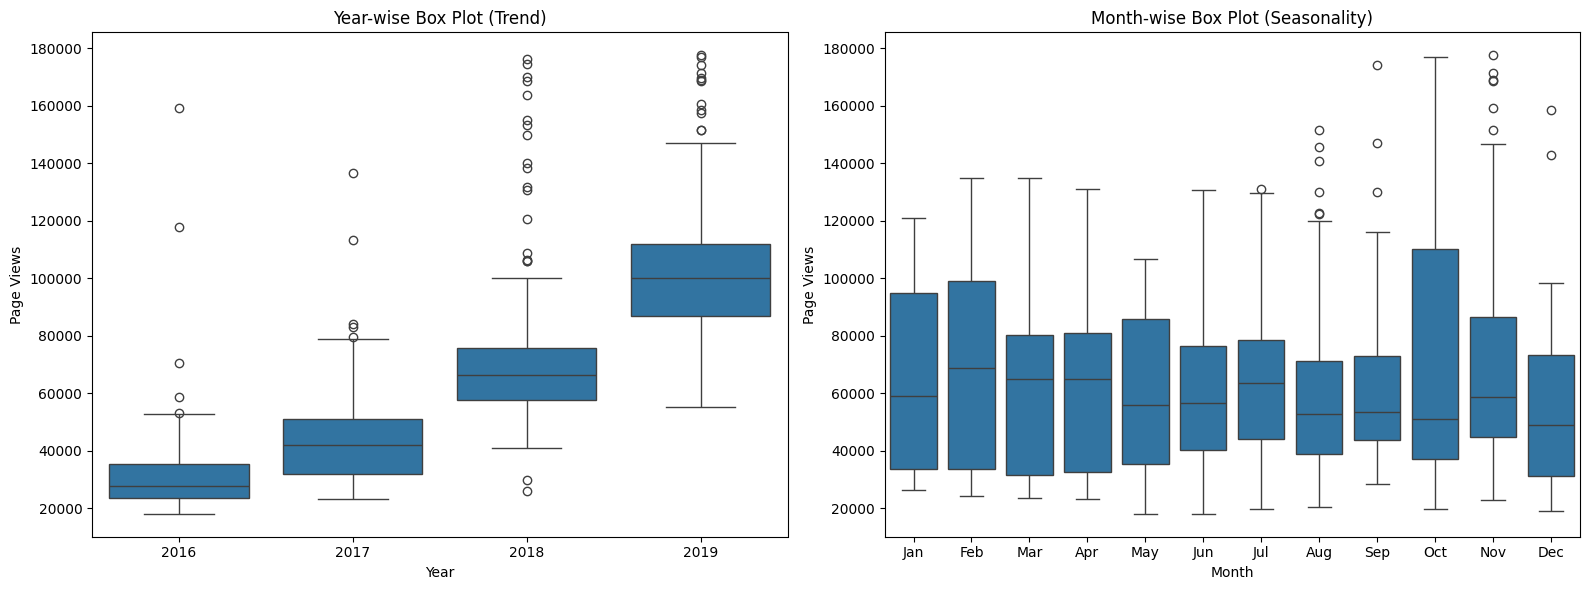

In [5]:
# Step 5: Prepare data for box plots
df_box = df_clean.copy().reset_index()

# Extract year and month (abbreviated)
df_box['year'] = df_box['date'].dt.year
df_box['month'] = df_box['date'].dt.strftime('%b')
df_box['month_num'] = df_box['date'].dt.month

# Sort by month number for correct order
df_box = df_box.sort_values('month_num')

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Year-wise Box Plot
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

# Month-wise Box Plot
sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

# Finalize and save
plt.tight_layout()
plt.savefig('box_plot.png')
plt.show()
